ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [2]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

**1)**

Median = average of 5th and 6th values

    Median = (33 + 33) / 2 = 33

**IQR**

Q1(median of first 5 values)
= 32

Q3(median of last 5 values)
= 34

IQR = Q3 - Q1 = 34 - 32 = 2


**2)**

Lower = Q1 - 1.5 * IQR = 32 - 3 = 29

Upper = Q3 + 1.5 * IQR = 34 + 3 = 37

As 500 > 37, it is an outlier.

**3)**

Median and IQR are kind of robust statistics, they are not heavily effected by the extreme large value.
Median and IQR better represent the central tendency and spread for skewed data like the value of 500 of this data set. So thats why i think median + IQR may be better than mean + standard deviation for this dataset.

In [4]:

# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
data_q1
median = np.median(data_q1)
print("median : ",median)
q1 = np.quantile(data_q1, 0.25)
q3 = np.quantile(data_q1, 0.75)
iqr = q3 - q1
print("iqr : ",iqr)
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print("lower fence : ",lower)
print("upper fence : ",upper)
outliers = [x for x in data_q1 if x < lower or x > upper]
print("outliers :", outliers)

median :  33.0
iqr :  2.0
lower fence :  29.0
upper fence :  37.0
outliers : [500]


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

**Given:**

Given, Prevalence, P(D) = 0.01

P(D') = 1 - P(D) = 0.99

Sensitivity, P(+ | D) = 0.9

Specificity, P(- | D) = 0.92

False positive rate, P(+ | D') = 1 - Specificity

= 1 - 0.92 = 0.08

Now, According to Bayes Theorem for PPV,

PPV = P(D | Pos) = { P(+| D) x P(D) } / [ { P(+ | D) x P(D) } + P(+| -D) x P(D')

**Calculation :**

PPV = (0.90 * 0.01) / (0.90 * 0.01 + 0.08 * 0.99)

PPV = 0.009 / (0.009 + 0.0792)

PPV = 0.009 / 0.0882 = 0.102

**Ans: PPV = 10.2%**

**If prevalence rises to 20%**

PPV = (0.90 * 0.20) / (0.90 * 0.20 + 0.08 * 0.80)

PPV = 0.18 / (0.18 + 0.064)

PPV = 0.18 / 0.244 = 0.738

**Ans: PPV = 73.8%**

**Explanation:**

When prevalence increases, PPV also increases. This is because Bayes numerator (true positives) grows as more people actually have the disease, while the denominators false positive part shrinks. In words, with higher prior probability of disease, a positive test result is more likely to be a true positive. Therefore, PPV rises with prevalence.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

1)As the target variable consisted by 0 and 1, so the Problem is binary Binary classification problem.

2)Four preprocessing steps :

   1.Handle missing values using mean , median or mode (if find any missing value)

   2.One-hot encode.

   3. Scale numeric features.

   4. Train - test split.

**3)** First, I would inspect the dataset to understand missing values and data types.
Numeric features such as age and daily_clicks would be imputed using median or mean.
The categorical region feature would be transformed using one-hot encoding.All numeric features would then be scaled to handle different ranges.Next, the dataset would be split into training and testing sets.A classification model such as logistic regression or decision tree would be trained on the training data.
Finally, I would check performance by using metrics like precision, recall, F1-score, and ROC-AUC.



---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [5]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


In [6]:
# Missing values
df.isnull().sum()


,0
age,2
region,0
purchases,1
premium_user,0


In [7]:
# Unique values per column
df.nunique()


,0
age,5
region,4
purchases,6
premium_user,2


In [8]:
# Correlation
df.corr(numeric_only=True)


,age,purchases,premium_user
age,1.000000,0.923677,0.789534
purchases,0.923677,1.000000,0.825860
premium_user,0.789534,0.825860,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5 non-null      float64
 1   region        7 non-null      object 
 2   purchases     6 non-null      float64
 3   premium_user  7 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 356.0+ bytes


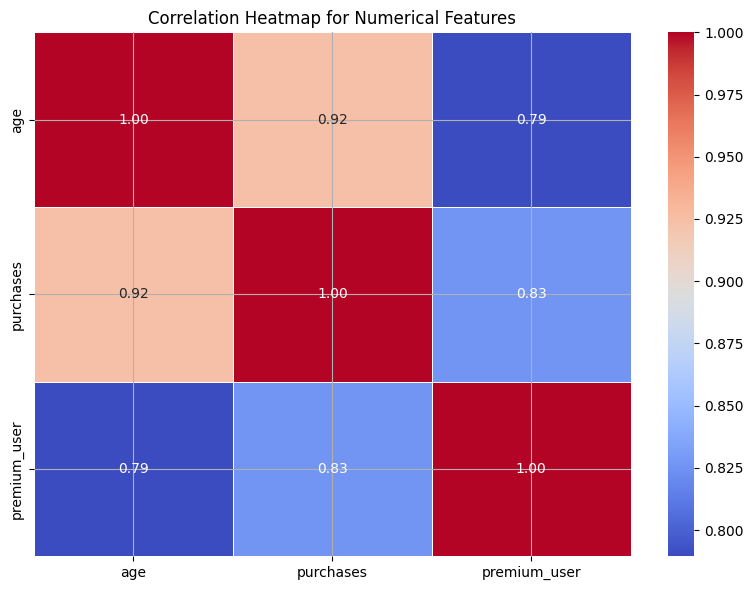

In [10]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt
num_for_corr = ["age", "purchases", "premium_user"]
## Complete this code block to generate correlation heatmap and pairplot [You need to complete]
corr_m = df[num_for_corr].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_m, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.tight_layout()
plt.show()

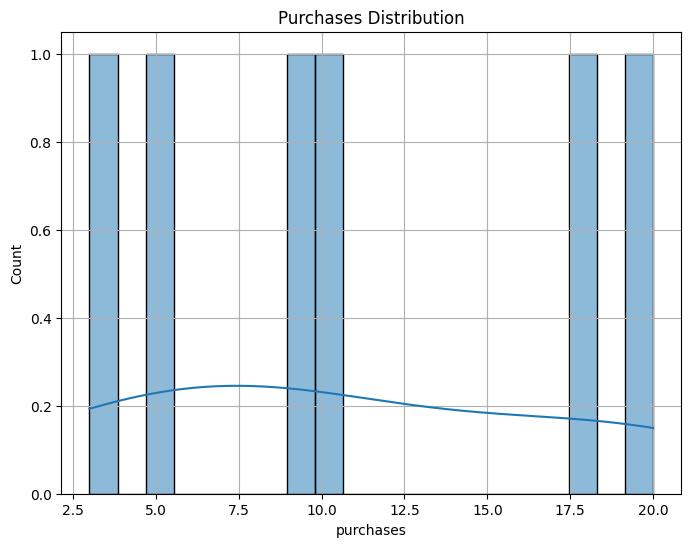

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(df['purchases'], kde = True , bins = 20)
plt.title("Purchases Distribution")
plt.show()

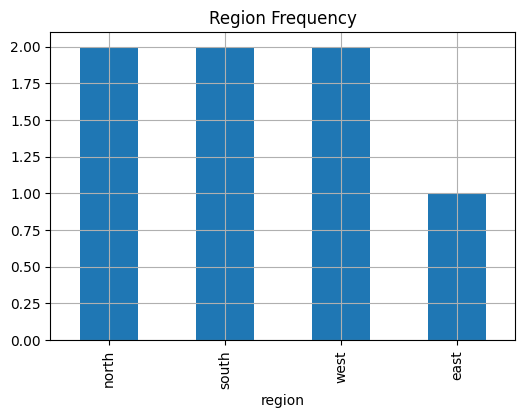

In [12]:
# Bar chart of region
df["region"].value_counts().plot(kind="bar")
plt.title("Region Frequency")
plt.show()

In [13]:
# Impute age with median.
# Impute purchases with mean.
age_median = df['age'].median()
df['age'] = df['age'].fillna(age_median)
purchases_mean = df['purchases'].mean()
df['purchases'] = df['purchases'].fillna(purchases_mean)
df

,age,region,purchases,premium_user
0,25.0,north,3.000000,0
1,30.0,south,10.000000,1
2,30.0,north,5.000000,0
3,22.0,east,10.833333,0
4,45.0,west,20.000000,1
5,52.0,west,18.000000,1
6,30.0,south,9.000000,0


In [14]:
df.drop(columns=['Age','Purchases'], inplace=True)
df.isnull().sum()

KeyError: "['Age', 'Purchases'] not found in axis"

In [15]:
#One hot encode region.
df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [16]:
df['region_north'] = df['region_north'].astype(int)
df['region_south'] = df['region_south'].astype(int)
df['region_west'] = df['region_west'].astype(int)
df

,age,purchases,premium_user,region_north,region_south,region_west
0,25.0,3.000000,0,1,0,0
1,30.0,10.000000,1,0,1,0
2,30.0,5.000000,0,1,0,0
3,22.0,10.833333,0,0,0,0
4,45.0,20.000000,1,0,0,1
5,52.0,18.000000,1,0,0,1
6,30.0,9.000000,0,0,1,0


In [17]:
# Scale all numeric columns using RobustScaler.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
num_c = ['age', 'purchases']
df[num_c] = scaler.fit_transform(df[num_c])
df

,age,purchases,premium_user,region_north,region_south,region_west
0,-0.5,-0.943820,0,1,0,0
1,0.0,0.000000,1,0,1,0
2,0.0,-0.674157,0,1,0,0
3,-0.8,0.112360,0,0,0,0
4,1.5,1.348315,1,0,0,1
5,2.2,1.078652,1,0,0,1
6,0.0,-0.134831,0,0,1,0


In [18]:
# df["age_purchase_interaction"] = df["age"] * df["purchases"] eita o kora jai
df["high_spender"] = (df["purchases"] > df["purchases"].mean()).astype(int)
df

,age,purchases,premium_user,region_north,region_south,region_west,high_spender
0,-0.5,-0.943820,0,1,0,0,0
1,0.0,0.000000,1,0,1,0,0
2,0.0,-0.674157,0,1,0,0,0
3,-0.8,0.112360,0,0,0,0,1
4,1.5,1.348315,1,0,0,1,1
5,2.2,1.078652,1,0,0,1,1
6,0.0,-0.134831,0,0,1,0,0


In [19]:
# Show the final transformed dataframe ready for model training
df

,age,purchases,premium_user,region_north,region_south,region_west,high_spender
0,-0.5,-0.943820,0,1,0,0,0
1,0.0,0.000000,1,0,1,0,0
2,0.0,-0.674157,0,1,0,0,0
3,-0.8,0.112360,0,0,0,0,1
4,1.5,1.348315,1,0,0,1,1
5,2.2,1.078652,1,0,0,1,1
6,0.0,-0.134831,0,0,1,0,0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [21]:
# Q5 – Student Answer

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2.head()

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df2[['area_sqft', 'bedrooms']]
y = df2['price']
#Split the data into train and test with 80 percent train and 20 percent test.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)
#Fit a LinearRegression model to predict price from area_sqft and bedrooms.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#Print model intercept, coefficients, and predictions on the test set.
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Predictions on test set:", y_pred)

Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]
Predictions on test set: [100.         130.76923077]


In [23]:
import numpy as np
# Mean Absolute Error (MAE)
# Root Mean Squared Error (RMSE)
# R squared (R²)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :", mae)
print("Root Mean Squared Error :", rmse)
print("R squared :", r2)

Mean Absolute Error : 19.615384615384613
Root Mean Squared Error : 19.61915499208746
R squared : -0.7107166337935567


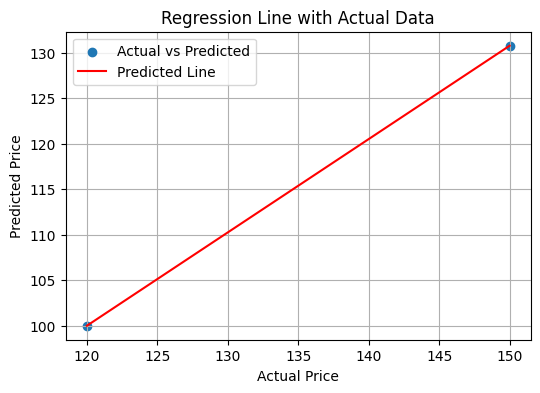

In [24]:
# Scatter plot for actual data
plt.scatter(y_test, y_pred, label="Actual vs Predicted")
plt.plot(y_test, y_pred, color="red", label="Predicted Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Regression Line with Actual Data")
plt.legend()
plt.grid(True)
plt.show()


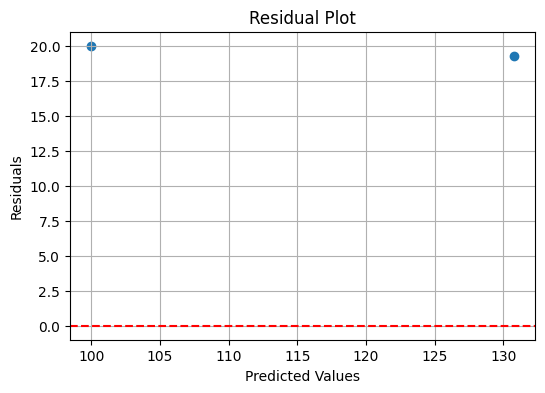

In [25]:
# Plot a residual plot with y_true − y_pred on the vertical axis and y_pred on the horizontal axis.
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

It indicating a good linear fit for this simple dataset because the residuals are small means predicted values are close to actual values.and randomly distributed means no clear pattern, which suggests the model is not missing any systematic trend.

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [26]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below

In [27]:
# Threshold 0.5
y_pred_05 = (y_prob >= 0.5).astype(int)
print(y_pred_05)

[1 0 1 0 1 0 1 0 1 0]


In [28]:
# Confusion matrix
# Precision
# Recall
# F1 score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_true, y_pred_05)
print("Confusion Matrix : \n",cm)
p_s = precision_score(y_true, y_pred_05)
print("Precision : ",p_s)
r_c = recall_score(y_true, y_pred_05)
print("Recall : ",r_c)
f1 = f1_score(y_true, y_pred_05)
print("F1 Score : ",f1)

Confusion Matrix : 
 [[5 0]
 [0 5]]
Precision :  1.0
Recall :  1.0
F1 Score :  1.0


In [29]:
# Threshold 0.3
y_pred_03 = (y_prob >= 0.3).astype(int)
print(y_pred_03)
cm = confusion_matrix(y_true, y_pred_03)
print("Confusion Matrix : \n",cm)
p_s = precision_score(y_true, y_pred_03)
print("Precision : ",p_s)
r_c = recall_score(y_true, y_pred_03)
print("Recall : ",r_c)
f1 = f1_score(y_true, y_pred_03)
print("F1 Score : ",f1)

[1 0 1 0 1 1 1 1 1 0]
Confusion Matrix : 
 [[3 2]
 [0 5]]
Precision :  0.7142857142857143
Recall :  1.0
F1 Score :  0.8333333333333334


Lowering the threshold increases recall but reduces precision.
More samples are classified as positive, capturing more true positives.
However, this also increases false positives.

In [30]:
from sklearn.metrics import roc_curve, auc


In [31]:
#ROC curve and AUC
fpr,tpr,thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr,tpr)
print('AUC: ',round(roc_auc, 3))

AUC:  1.0


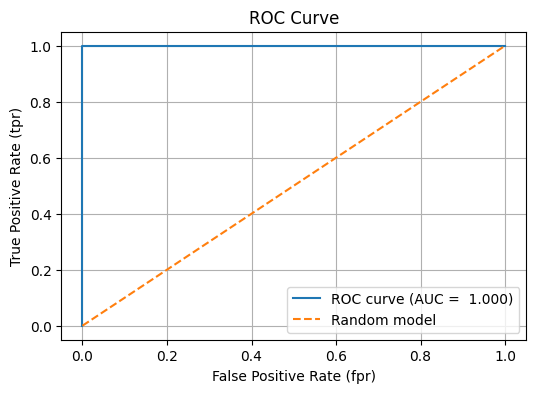

In [32]:
#Plot
plt.figure()
plt.plot(fpr,tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()


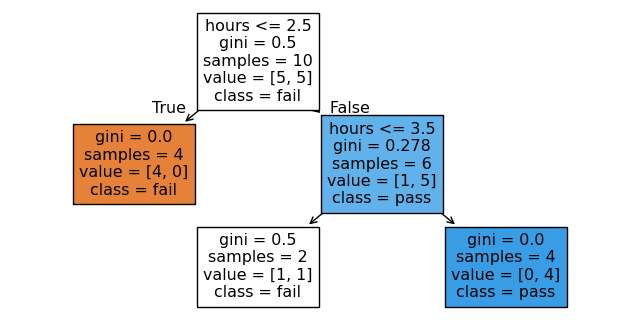

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})

X = df3[["hours"]]
y = df3["passed"]

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

plt.figure(figsize=(8,4))
plot_tree(tree, feature_names=["hours"], class_names=["fail","pass"], filled=True)
plt.show()


The tree is unlikely to significantly overfit with a little dataset and low depth.
While still capturing basic patterns, the shallow depth helps the model generalize better.

A high AUC means the model separates positive and negative classes well across thresholds.

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._